<a href="https://colab.research.google.com/github/pavanibill/Hotel-booking-data-analysis/blob/main/Pavani_of_Copy_of_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [3]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
store_data = pd.read_csv('/content/drive/MyDrive/Data & Resources/Rossmann Stores Data.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
store_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
train_data = pd.read_csv('/content/drive/MyDrive/Data & Resources/store.csv')

In [7]:
train_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
combined_data = pd.merge(store_data,train_data, on = 'Store')



In [9]:
combined_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [10]:
combined_data.shape

(1017209, 18)

In [11]:
# Checking for null values
combined_data.isnull().mean()*100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
dtype: float64

In [12]:
# Unique values
columns = list(combined_data.columns)
columns.remove('Date')
columns.remove('CompetitionDistance')
for i in columns:
    print('Unique values in column :',combined_data[i].unique())

Unique values in column : [   1    2    3 ... 1113 1114 1115]
Unique values in column : [5 4 3 2 1 7 6]
Unique values in column : [ 5263  5020  4782 ... 20362 18841 21237]
Unique values in column : [ 555  546  523 ... 3727 4022 4106]
Unique values in column : [1 0]
Unique values in column : [1 0]
Unique values in column : ['0' 'a' 'b' 'c' 0]
Unique values in column : [1 0]
Unique values in column : ['c' 'a' 'd' 'b']
Unique values in column : ['a' 'c' 'b']
Unique values in column : [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values in column : [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values in column : [0 1]
Unique values in column : [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values in column : [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values in column : [nan 'Jan,Apr,Jul,Oct' '

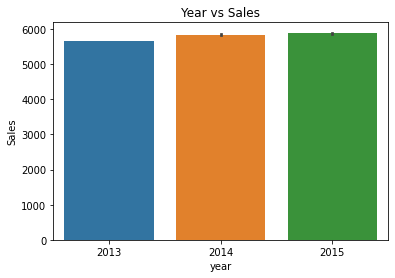

In [13]:
# extracting year and month from Date 
combined_data['year'] = combined_data['Date'].apply(lambda x : int(str(x)[0:4]))
combined_data['month'] = combined_data['Date'].apply(lambda x : int(str(x)[5:7]))

# Sales with respect to year 
sns.barplot(x='year', y='Sales', data=combined_data).set(title='Year vs Sales')
# sns.barplot(x='month',y='Sales', data=combined_data).set(title='Month vs Sales')

plt.show()

[Text(0.5, 1.0, 'Sales vs Day of Week')]

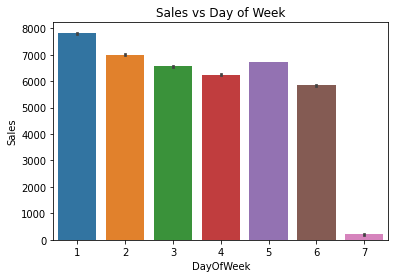

In [14]:
sns.barplot(x='DayOfWeek',y='Sales',data=combined_data).set(title='Sales vs Day of Week')

[Text(0.5, 1.0, 'Sales on Promo')]

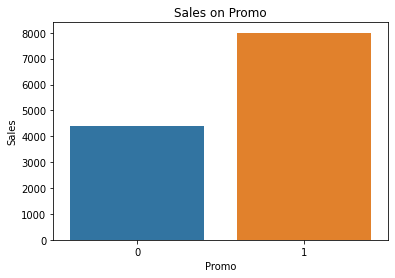

In [15]:
# Lets see how promo is impacting sales
sns.barplot(x='Promo',y='Sales',data=combined_data).set(title='Sales on Promo')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


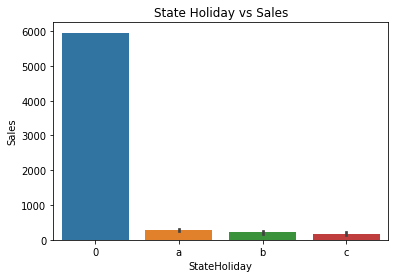

In [16]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"

combined_data['StateHoliday'].loc[combined_data['StateHoliday'] == 0] = '0'

# Sales with respect to State Holiday
sns.barplot(x='StateHoliday', y='Sales', data=combined_data).set(title='State Holiday vs Sales')
plt.show()

[Text(0.5, 1.0, 'School Holiday vs Sales')]

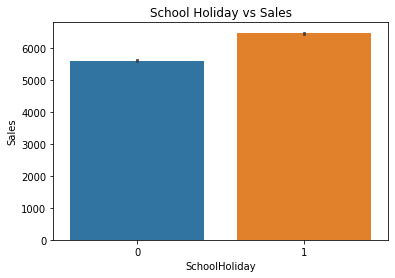

In [17]:
# Sales with respect to School Holiday
sns.barplot(x='SchoolHoliday', y='Sales', data=combined_data).set(title='School Holiday vs Sales')

[Text(0.5, 1.0, 'StoreType vs Sales')]

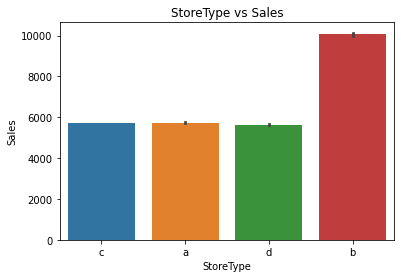

In [18]:
# Sales with respect to Storetype
sns.barplot(x='StoreType', y='Sales', data=combined_data).set(title='StoreType vs Sales')

[Text(0.5, 1.0, 'Assortment vs Sales')]

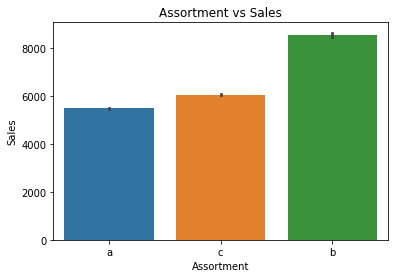

In [19]:
# Sales with respect to Assortment
sns.barplot(x='Assortment', y='Sales', data=combined_data).set(title='Assortment vs Sales')

In [20]:
store_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [21]:
train_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [25]:
# Filling Promo2SinceWeek, Promo2SinceYear, PromoInterval with 0
store_data.update(store_data['Promo'].fillna(value=0,inplace=True))
store_data.update(store_data['StateHoliday'].fillna(value=0,inplace=True))
store_data.update(store_data['SchoolHoliday'].fillna(value=0,inplace=True))

In [27]:
# Filling CompetitionDistance with mean distance
mean_CompetitionDistance = store_data['Sales'].mean()
store_data.update(store_data['Sales'].fillna(value=mean_CompetitionDistance,inplace=True))


In [29]:
mode_CompetitionOpenSinceMonth = store_data['Customers'].mode()[0]
mode_CompetitionOpenSinceYear = store_data['Open'].mode()[0]

store_data.update(store_data['Customers'].fillna(value=mode_CompetitionOpenSinceMonth,inplace=True))
store_data.update(store_data['Open'].fillna(value=mode_CompetitionOpenSinceYear,inplace=True))

store_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [30]:
combined_data = pd.merge(store_data,train_data,on='Store')
print(combined_data.shape)
combined_data.head(5)

(1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [31]:
combined_data.isnull().mean()*100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
dtype: float64

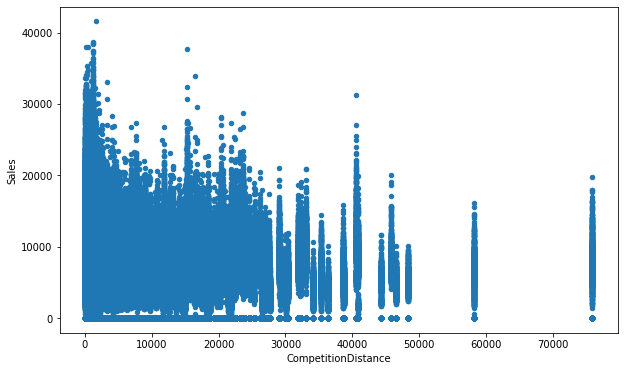

In [32]:
combined_data.plot(x='CompetitionDistance',y='Sales',kind='scatter',figsize =(10,6))

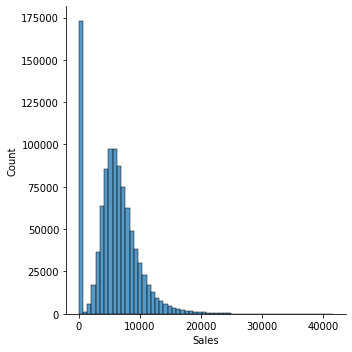

In [33]:
sns.displot(combined_data,x='Sales',bins=60)

Total No.of outliers in dataset:  9731


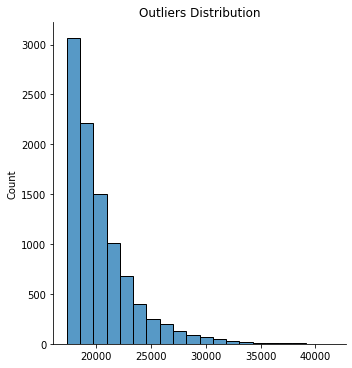

In [35]:
mean_sales = np.mean(combined_data['Sales'])
std_sales = np.std(combined_data['Sales'])
threshold = 3

outliers = []
for i in combined_data['Sales']:
    z_score = (i-mean_sales)/std_sales
    if z_score > threshold:
        outliers.append(i)
        
print('Total No.of outliers in dataset: ', len(outliers))

sns.displot(x=outliers,bins=20).set(title='Outliers Distribution')

In [36]:
# Percentage of Outliers 
zero_sales = combined_data.loc[combined_data['Sales']==0]

sales_greater_than_25k = combined_data.loc[combined_data['Sales'] > 25000]

print('Length of the dataset:', len(combined_data))
print('Percentage of Zeros in dataset: %.3f%%' %((len(zero_sales)/len(combined_data))*100))
print('Percentage of sales greater than 25k in dataset: %.3f%% ' %((len(sales_greater_than_25k)/len(combined_data))*100))

Length of the dataset: 1017209
Percentage of Zeros in dataset: 16.995%
Percentage of sales greater than 25k in dataset: 0.075% 


In [37]:
combined_data.drop(combined_data.loc[combined_data['Sales'] > 25000].index,inplace=True)

In [38]:
combined_data.shape

(1016451, 18)

In [39]:
no_sales = combined_data.loc[(combined_data['Sales']==0) & (combined_data['Open'] == 1) & (combined_data['StateHoliday'] == 0) 
                               & (combined_data['SchoolHoliday'] == 0)]
print(no_sales.shape)
no_sales.head()

(12, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
22589,25,4,2014-02-13,0,0,1,0,0,0,c,a,430.0,4.0,2003.0,0,NaN,NaN,NaN
22590,25,3,2014-02-12,0,0,1,0,0,0,c,a,430.0,4.0,2003.0,0,NaN,NaN,NaN
25212,28,4,2014-09-04,0,0,1,1,0,0,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec"
205303,227,4,2014-09-11,0,0,1,0,0,0,a,a,2370.0,NaN,NaN,0,NaN,NaN,NaN
297110,327,3,2014-03-12,0,0,1,0,0,0,c,c,1390.0,12.0,2004.0,0,NaN,NaN,NaN


In [40]:
combined_data.drop(combined_data.loc[(combined_data['Sales']==0) & (combined_data['Open'] == 1)
                                     & (combined_data['StateHoliday'] == 0) & 
                                     (combined_data['SchoolHoliday'] == 0)].index,inplace=True)
print(combined_data.shape)

(1016439, 18)


In [41]:
combined_data.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [42]:
combined_data['Year'] = combined_data['Date'].apply(lambda x: int(str(x)[0:4]))
combined_data['Month'] = combined_data['Date'].apply(lambda x: int(str(x)[5:7]))
combined_data.drop(['Date'],axis=1,inplace=True)

combined_data.head(5)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7
1,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7
2,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7
3,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7
4,1,1,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7


In [43]:
combined_data.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
Year                           int64
Month                          int64
dtype: object

In [44]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"

combined_data['StateHoliday'].loc[combined_data['StateHoliday'] == 0] = '0'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [57]:
# SchoolHoliday column has values 0 & "0", So, we need to change values with 0 to "0"

combined_data['SchoolHoliday'].loc[combined_data['SchoolHoliday'] == 0] = '0'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [61]:
combined_data['SchoolHoliday'].head()


0    1
1    1
2    1
3    1
4    1
Name: SchoolHoliday, dtype: object

In [47]:
# encoding all categorical varibale to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

combined_data['StoreType'] = label_encoder.fit_transform(combined_data['StoreType'])
combined_data['Assortment'] = label_encoder.fit_transform(combined_data['Assortment'])
combined_data['StateHoliday'] = label_encoder.fit_transform(combined_data['StateHoliday'])
combined_data['PromoInterval'] = label_encoder.fit_transform(combined_data['PromoInterval'])

combined_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3,2015,7
1,1,4,5020,546,1,1,0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3,2015,7
2,1,3,4782,523,1,1,0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3,2015,7
3,1,2,5011,560,1,1,0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3,2015,7
4,1,1,6102,612,1,1,0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3,2015,7


In [48]:
# Correlation
correlation = combined_data.corr()
correlation


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
Store,1.000000,0.000283,0.004593,0.024109,-0.000097,-0.000208,0.000482,0.000552,-0.021410,0.004245,-0.026325,-0.050669,-0.004316,0.008589,0.009820,0.038913,-0.013420,0.000303,0.001444
DayOfWeek,0.000283,1.000000,-0.466677,-0.391695,-0.529153,-0.392648,-0.044323,-0.205408,-0.000216,0.000095,-0.000128,-0.000136,-0.000202,0.000073,0.000242,-0.000014,-0.000071,0.001839,-0.005081
Sales,0.004593,-0.466677,1.000000,0.893088,0.685319,0.455860,-0.232186,0.086117,-0.011098,0.076279,-0.017275,-0.025955,0.012066,-0.089048,0.059165,-0.020687,0.077998,0.024549,0.047226
Customers,0.024109,-0.391695,0.893088,1.000000,0.624471,0.319065,-0.207876,0.072633,-0.141081,0.008024,-0.101891,-0.027964,0.008221,-0.148849,0.040035,0.029392,0.135094,-0.000422,0.036658
Open,-0.000097,-0.529153,0.685319,0.624471,1.000000,0.295007,-0.341041,0.086203,-0.003156,0.002999,0.008166,0.001590,0.002716,-0.008068,-0.002471,0.001671,0.007691,-0.000957,-0.000847
Promo,-0.000208,-0.392648,0.455860,0.319065,0.295007,1.000000,-0.024091,0.067567,0.000032,0.000247,0.000360,0.000293,0.000280,-0.000715,-0.001073,-0.000215,0.000663,0.024432,-0.011989
StateHoliday,0.000482,-0.044323,-0.232186,-0.207876,-0.341041,-0.024091,1.000000,0.196512,0.001318,-0.001403,-0.000394,0.000560,-0.002555,0.004867,0.002067,0.000684,-0.004675,-0.005095,0.038118
SchoolHoliday,0.000552,-0.205408,0.086117,0.072633,0.086203,0.067567,0.196512,1.000000,0.000054,-0.002581,-0.003669,-0.000539,0.001538,-0.006891,-0.003163,-0.003689,0.006071,-0.036569,0.103360
StoreType,-0.021410,-0.000216,-0.011098,-0.141081,-0.003156,0.000032,0.001318,0.000054,1.000000,0.232933,0.078012,0.026614,0.025079,0.088682,-0.016618,-0.067177,-0.072958,-0.001587,-0.007517
Assortment,0.004245,0.000095,0.076279,0.008024,0.002999,0.000247,-0.001403,-0.002581,0.232933,1.000000,0.146554,-0.001045,0.061450,0.008135,-0.079190,0.057262,0.023698,0.001454,0.007404


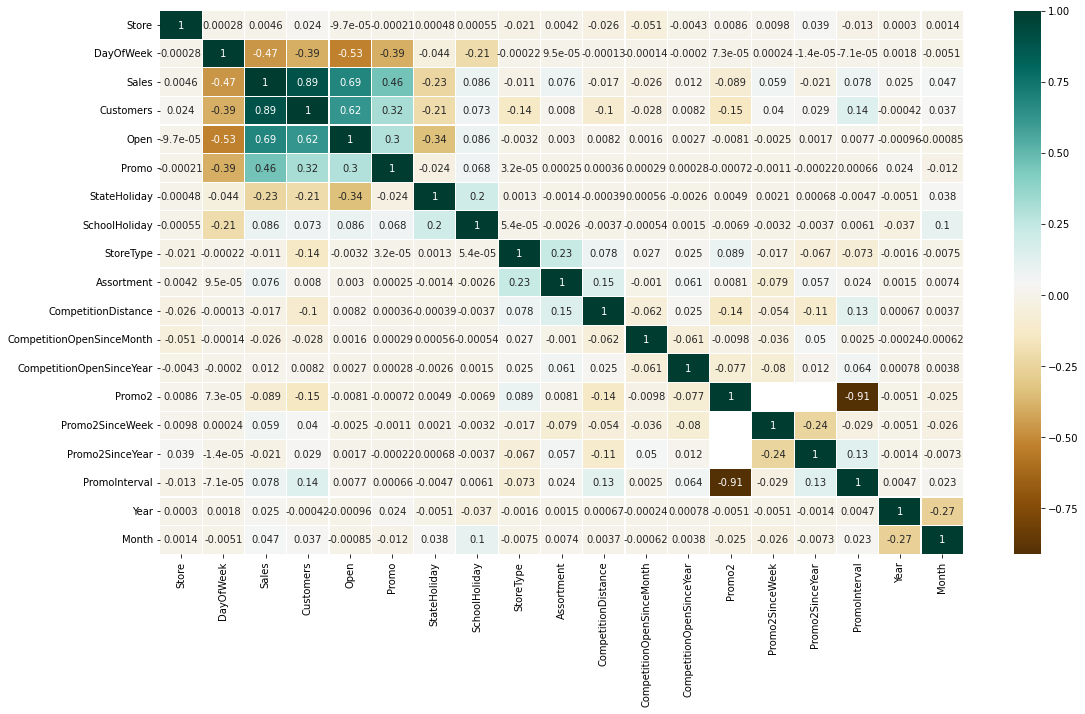

In [49]:
# Heat Map
plt.figure(figsize=(18,10))
sns.heatmap(correlation, annot=True, linewidths=0.2, cmap='BrBG')

In [50]:
combined_data_open = combined_data[combined_data['Open']==1]
combined_data_closed = combined_data[combined_data['Open']==0]

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

X_train, X_test, y_train, y_test_open = train_test_split(combined_data_open.drop(['Sales','Customers','Open'],axis=1),
                                                        combined_data_open['Sales'], test_size=0.2, random_state=2)

In [53]:
X_train.columns

Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month'],
      dtype='object')

In [54]:
y_train.head()

47153      6242
638997     4886
297244     6447
769229     4139
428280    16869
Name: Sales, dtype: int64

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

ValueError: ignored